Relax Inc. makes productivity and project management software that's popular with both individuals and teams. Founded by several former Facebook employees, it's considered a great company to work for.

Question to Answer:
## identify which factors predict future user adoption

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one seven­day period, identify which factors predict future user
adoption.
We suggest spending 1­2 hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better ­­ no more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score

In [194]:
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [195]:
users = pd.read_csv('takehome_users.csv',encoding = 'ISO-8859-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [196]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [197]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement['wk'] = engagement['time_stamp'].dt.week
engagement = engagement.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name = 'count').drop_duplicates()

C:\Users\alw-hp-17\AppData\Local\Temp\ipykernel_1904\2652983173.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  engagement['wk'] = engagement['time_stamp'].dt.week


In [198]:
engagement.head()

,wk,user_id,count
0,1,2,1
1,1,10,5
2,1,42,4
3,1,43,1
4,1,46,1


In [199]:
engagement.head()

,wk,user_id,count
0,1,2,1
1,1,10,5
2,1,42,4
3,1,43,1
4,1,46,1


In [200]:
engagement['adopted_user'] = np.nan
engagement['adopted_user'] = np.where(engagement['count'] >= 3, 1, engagement['adopted_user'])
engagement['adopted_user'] = np.where(engagement['count'] <3, 0, engagement['adopted_user'])

In [201]:
engagement.head()

,wk,user_id,count,adopted_user
0,1,2,1,0.0
1,1,10,5,1.0
2,1,42,4,1.0
3,1,43,1,0.0
4,1,46,1,0.0


In [203]:
engagement = engagement.rename(columns={"user_id": 'object_id'})

In [204]:
engagement

,wk,object_id,count,adopted_user
0,1,2,1,0.0
1,1,10,5,1.0
2,1,42,4,1.0
3,1,43,1,0.0
4,1,46,1,0.0
...,...,...,...,...
57167,52,11961,1,0.0
57168,52,11964,2,0.0
57169,52,11969,3,1.0
57170,52,11974,1,0.0


In [205]:
merged = pd.merge(engagement, users, on = 'object_id')

In [206]:
merged.head()

,wk,object_id,count,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2,1,0.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,2,2,1,0.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,6,2,3,1.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,7,2,2,0.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,10,2,1,0.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [207]:
merged = merged.drop(['object_id', 'count', 'name', 'email', 'wk'], axis = 1)

In [208]:
merged['creation_time'] = pd.to_datetime(merged.creation_time, infer_datetime_format = True)
merged['month'] = merged.creation_time.dt.month
merged['day'] = merged.creation_time.dt.day
merged['year'] = merged.creation_time.dt.year

In [210]:
merged.drop(['creation_time', 'invited_by_user_id'], axis = 1, inplace = True)

In [211]:
merged_d = pd.get_dummies(merged, columns = ['creation_source', 'year', 'month', 'day'], drop_first = True)

In [212]:
merged_d.head()

,adopted_user,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,year_2013,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0.0,1.396238e+09,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.396238e+09,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.396238e+09,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.396238e+09,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.396238e+09,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [213]:
y = merged_d.adopted_user
X = merged_d.loc[:, merged_d.columns != 'adopted_user']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=15)

In [227]:
rfc = RandomForestClassifier()

In [228]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [229]:
y_pred = rfc.predict(X_test)

In [230]:
print(classification_report(y_test, y_pred, target_names = ['non-adopted', 'adopted']))

              precision    recall  f1-score   support

 non-adopted       0.81      0.78      0.80      8260
     adopted       0.80      0.83      0.82      8892

    accuracy                           0.81     17152
   macro avg       0.81      0.81      0.81     17152
weighted avg       0.81      0.81      0.81     17152



In [231]:
feature_importances = list(zip(X.columns, rfc.feature_importances_))
features_sorted = sorted(feature_importances, key = lambda x: x[1], reverse = True)
features, scores = zip(*features_sorted)
features_df = pd.DataFrame(np.array(scores), index = features, columns = ["value"])

<AxesSubplot:>

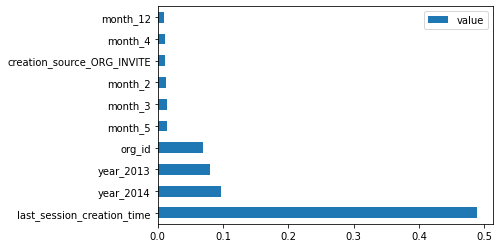

In [232]:
features_df[:10].plot(kind = 'barh')